In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn import model_selection 
from sklearn import neighbors

In [2]:
RANDOM_SEED = 0x0

In [3]:
df = pd.read_csv('data/diabetes.csv', delimiter=';')
df

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,prog
0,36,1,27.8,73.00,153,104.4,42,4.00,3.4965,73,201
1,48,1,22.8,101.00,110,41.6,56,2.00,4.1271,97,40
2,56,1,35.0,79.33,195,140.8,42,4.64,4.1109,96,140
3,66,2,34.6,115.00,204,139.4,36,6.00,4.9628,109,264
4,49,2,25.9,91.00,178,106.6,52,3.00,4.5747,75,92
...,...,...,...,...,...,...,...,...,...,...,...
436,59,2,26.9,104.00,194,126.6,43,5.00,4.8040,106,311
437,48,1,20.4,98.00,209,139.4,46,5.00,4.7707,78,83
438,57,1,26.9,98.00,246,165.2,38,7.00,5.3660,96,249
439,33,1,18.9,70.00,162,91.8,59,3.00,4.0254,58,72


## Univariate regression
1 independent variable: 'bmi'

In [4]:
X = df['bmi'].to_numpy().reshape(-1, 1)
y = df['prog'].to_numpy()

1. Split the data in the train and test set (80/20), set random_state to RANDOM_SEED.

In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, 
                                                                    random_state=RANDOM_SEED)

### Nearest neighbor regression
Apply nearest neighbor egression on the data and predict y values for the training and test data

In [6]:
knn = neighbors.KNeighborsRegressor(n_neighbors=5, weights='uniform')
knn.fit(X_train, y_train)
y_hat_train= knn.predict(X_train)
y_hat_test = knn.predict(X_test)

Calculate MSE for training as well as for test data.

In [7]:
from sklearn.metrics import mean_squared_error

In [8]:
rmsd_train = mean_squared_error(y_train, y_hat_train, squared=False)
rmsd_test = mean_squared_error(y_test, y_hat_test, squared=False)

print(f"RMSD of training data: {rmsd_train}")
print(f"RMSD of test data: {rmsd_test}")

RMSD of training data: 54.14635679845371
RMSD of test data: 72.02861478825348


Visualize the model's artefacts: Plot all the data as well as Linear Regression predictions for training and test data in a scatter plot. Don't forget a legend to differentiate the data.

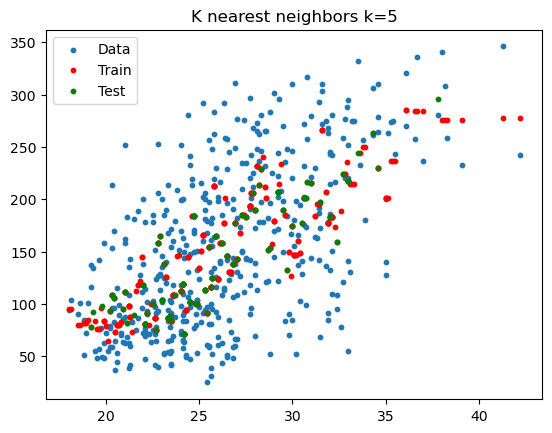

In [9]:
plt.figure()
plt.scatter(X[:,0], y, s=10, label='Data')
plt.scatter(X_train, y_hat_train, color='r', s=10, label='Train')
plt.scatter(X_test, y_hat_test, color='g', s=10, label='Test')
plt.title('K nearest neighbors k='+str(knn.n_neighbors))
plt.legend()
plt.show()

**Task**: Investigate how the training and test RMSD behave for varying values for the hyperparameter $k$

In [10]:
rmsds_train = []
rmsds_test = []
for k in [1,5,20,50,10]:
    ...

**Solution**:

In [11]:
rmsds_train = []
rmsds_test = []
ks = [1,5,20,50,100]
for k in ks:
    knn = neighbors.KNeighborsRegressor(n_neighbors=k, weights='uniform')
    knn.fit(X_train, y_train)
    y_hat_train= knn.predict(X_train)
    y_hat_test = knn.predict(X_test)
    rmsds_train.append(mean_squared_error(y_train, y_hat_train, squared=False))
    rmsds_test.append(mean_squared_error(y_test, y_hat_test, squared=False))

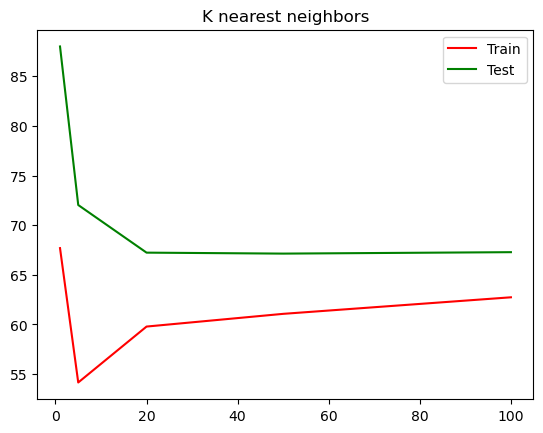

In [12]:
plt.figure()
plt.plot(ks, rmsds_train, color='r', label='Train')
plt.plot(ks, rmsds_test, color='g', label='Test')
plt.title('K nearest neighbors')
plt.legend()
plt.show()

### Linear regression
Changing the model is very simple in scikit-learn:

In [13]:
from sklearn import linear_model

In [14]:
lin1 = linear_model.LinearRegression()
lin1.fit(X_train, y_train)

y_hat_train= lin1.predict(X_train)
y_hat_test = lin1.predict(X_test)

In [15]:
rmsd_train = mean_squared_error(y_train, y_hat_train, squared=False)
rmsd_test = mean_squared_error(y_test, y_hat_test, squared=False)

print(f"RMSD of training data: {rmsd_train}")
print(f"RMSD of test data: {rmsd_test}")

RMSD of training data: 61.22930256579237
RMSD of test data: 66.81572936362153


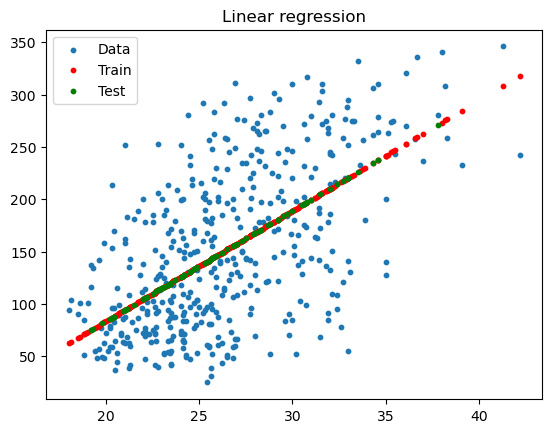

In [16]:
plt.figure()
plt.scatter(X[:,0], y, s=10, label='Data')
plt.scatter(X_train, y_hat_train, color='r', s=10, label='Train')
plt.scatter(X_test, y_hat_test, color='g', s=10, label='Test')
plt.title('Linear regression')
plt.legend()
plt.show()

### Polynomial regression

In [17]:
from sklearn.preprocessing import PolynomialFeatures

Investigate how well polynomial regression with polynomial degrees = 2 can solve the task. In order to do so, follow these steps:
1. Transform the training and test data accordingly to describe polynomial distribution of degree=2
2. Train a Linear Regression model on polynomial data
3. Make predictions for training data
4. Make predictions for test data
5. Calculate MSE for training as well as test data

In [18]:
def poly_regression(X_train, y_train, X_test, y_test, degree):
    polynomial_features= PolynomialFeatures(degree=degree)
    x_train_poly = polynomial_features.fit_transform(X_train)
    x_test_poly = polynomial_features.fit_transform(X_test)

    model = linear_model.LinearRegression()
    model.fit(x_train_poly, y_train)

    y_hat_train_poly = model.predict(x_train_poly)
    y_hat_test_poly = model.predict(x_test_poly)

    rmsd_train_poly = mean_squared_error(y_train, y_hat_train_poly, squared=False)
    rmsd_test_poly = mean_squared_error(y_test, y_hat_test_poly, squared=False)

    return y_hat_train_poly, y_hat_test_poly, rmsd_train_poly, rmsd_test_poly

In [19]:
y_hat_train_poly, y_hat_test_poly, rmsd_train_poly, rmsd_test_poly = poly_regression(X_train, y_train, X_test, y_test, degree=0)
print(f"RMSD of training data: {rmsd_train_poly}")
print(f"RMSD of test data: {rmsd_test_poly}")

RMSD of training data: 77.41174363339918
RMSD of test data: 75.05340747720405


**Task**: Investigate the influence of polynomial degrees on the results. Consider degrees in `range(0, 11)`. Plot the RMSD (on training as well as test data) as a function of the number of the polynomial degrees. 

Do the polynomial features bring a benefit?

In [37]:
rmsds_train = []
rmsds_test = []
for degree in range(0, 11):
    ...

**Solution**:

In [38]:
rmsds_test_poly = []
rmsds_train_poly = []

degrees = [deg for deg in range(0, 11)]

for degree in degrees:
    y_hat_train_poly, y_hat_test_poly, rmsd_train_poly, rmsd_test_poly = poly_regression(X_train, y_train, X_test, y_test, degree=degree)
    # plot_artefacts(x, y, X_train, y_pred_train_poly, X_test, y_pred_test_poly, f"Polynomial Regression with degree {degree}")
    rmsds_test_poly.append(rmsd_test_poly)
    rmsds_train_poly.append(rmsd_train_poly)

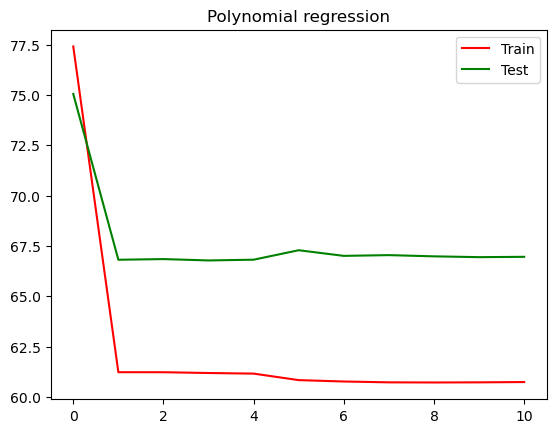

In [39]:
plt.figure()
plt.plot(degrees, rmsds_train_poly, color='r', label='Train')
plt.plot(degrees, rmsds_test_poly, color='g', label='Test')
plt.title('Polynomial regression')
plt.legend()
plt.show()

## Multivariate regression
Considering all available features

In [44]:
X = df.loc[:, df.columns != 'prog'].to_numpy()
y = df['prog'].to_numpy()

Split the data in the train and test set (80/20), set random_state to RANDOM_SEED.

In [45]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, 
                                                                    random_state=RANDOM_SEED)

In [46]:
lin = linear_model.LinearRegression()
lin.fit(X_train, y_train)

y_hat_train= lin.predict(X_train)
y_hat_test = lin.predict(X_test)

In [47]:
rmsd_train = mean_squared_error(y_train, y_hat_train, squared=False)
rmsd_test = mean_squared_error(y_test, y_hat_test, squared=False)

print(f"RMSD of training data: {rmsd_train}")
print(f"RMSD of test data: {rmsd_test}")

RMSD of training data: 52.08106871312483
RMSD of test data: 58.43751792325826
